In [1]:
import ROOT
import math
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/00


In [27]:
SUSY_pred = np.loadtxt('txt_files/Mstop_175_mchi_7_5_SUSY_pred.txt')
tt_pred   = np.loadtxt('txt_files/Mstop_175_mchi_7_5_tt_pred.txt')
st_pred   = np.loadtxt('txt_files/Mstop_175_mchi_7_5_st_pred.txt')
vv_pred   = np.loadtxt('txt_files/Mstop_175_mchi_7_5_vv_pred.txt')

In [33]:
SUSY_full_arr = []

for i in range(0,110) :                   # Loop over the variations
    
    # Indices 0-9 correspond to renorm and factorization variations
    if (i < 10) :
        var_file   = 'Renorm_variation_' + str(i) + '.txt'
        
    # Indices 10-110 correspond to PDF variations
    else :
        var_file   = 'PDF_variation_'    + str(i) + '.txt'
    
    weight_file    = np.loadtxt('Weights/SUSY/' + str(var_file))
    arr, bins      = np.histogram(SUSY_pred, bins=15, weights =weight_file[30000:])
    SUSY_full_arr.append(arr)

In [35]:
SUSY_ren_mat = np.matrix(SUSY_full_arr[0:10])

In [36]:
SUSY_pdf_mat = np.matrix(SUSY_full_arr[10:])

In [60]:
tt_full_arr = []

for i in range(0,110) :                   # Loop over the variations
    
    # Indices 0-9 correspond to renorm and factorization variations
    if (i < 10) :
        var_file   = 'Renorm_variation_' + str(i) + '.txt'
        
    # Indices 10-110 correspond to PDF variations
    else :
        var_file   = 'PDF_variation_'    + str(i) + '.txt'
    
    weight_file    = np.loadtxt('Weights/ttbar/' + str(var_file))
    arr, bins      = np.histogram(tt_pred, bins=15, weights =weight_file[20000:])
    tt_full_arr.append(arr)

In [61]:
tt_ren_mat = np.matrix(tt_full_arr[0:10])

In [62]:
tt_pdf_mat = np.matrix(tt_full_arr[10:])

In [63]:
st_full_arr = []

for i in range(0,110) :                   # Loop over the variations
    
    # Indices 0-9 correspond to renorm and factorization variations
    if (i < 10) :
        var_file   = 'Renorm_variation_' + str(i) + '.txt'
        
    # Indices 10-110 correspond to PDF variations
    else :
        var_file   = 'PDF_variation_'    + str(i) + '.txt'
    
    weight_file    = np.loadtxt('Weights/ST/' + str(var_file))
    arr, bins      = np.histogram(st_pred, bins=15, weights =weight_file[10000:])
    st_full_arr.append(arr)

In [64]:
st_ren_mat = np.matrix(st_full_arr[0:10])
st_pdf_mat = np.matrix(st_full_arr[10:])

In [65]:
vv_full_arr = []

for i in range(0,110) :                   # Loop over the variations
    
    # Indices 0-9 correspond to renorm and factorization variations
    if (i < 10) :
        var_file   = 'Renorm_variation_' + str(i) + '.txt'
        
    # Indices 10-110 correspond to PDF variations
    else :
        var_file   = 'PDF_variation_'    + str(i) + '.txt'
    
    weight_file    = np.loadtxt('Weights/VV/' + str(var_file))
    arr, bins      = np.histogram(vv_pred, bins=15, weights =weight_file[1000:])
    vv_full_arr.append(arr)
    
vv_ren_mat = np.matrix(vv_full_arr[0:10])
vv_pdf_mat = np.matrix(vv_full_arr[10:])

In [66]:
SUSY_pdf_unc = SUSY_pdf_mat.std(0)/ SUSY_pdf_mat.mean(0) * 0.41 * 100
tt_pdf_unc   = tt_pdf_mat.std(0)  / tt_pdf_mat.mean(0)   * 0.41 * 100
st_pdf_unc   = st_pdf_mat.std(0)  / st_pdf_mat.mean(0)   * 0.41 * 100
vv_pdf_unc   = vv_pdf_mat.std(0)  / vv_pdf_mat.mean(0)   * 0.41 * 100

In [67]:
# Combining like ren's here, not envolope
SUSY_ren_unc = SUSY_ren_mat.std(0)/ SUSY_ren_mat.mean(0) * 0.5 * 100   
tt_ren_unc   = tt_ren_mat.std(0)  / tt_ren_mat.mean(0)   * 0.5 * 100
st_ren_unc   = st_ren_mat.std(0)  / st_ren_mat.mean(0)   * 0.5 * 100
vv_ren_unc   = vv_ren_mat.std(0)  / vv_ren_mat.mean(0)   * 0.5 * 100

In [68]:
bin_centers  = (bins[:-1] + bins[1:])/2

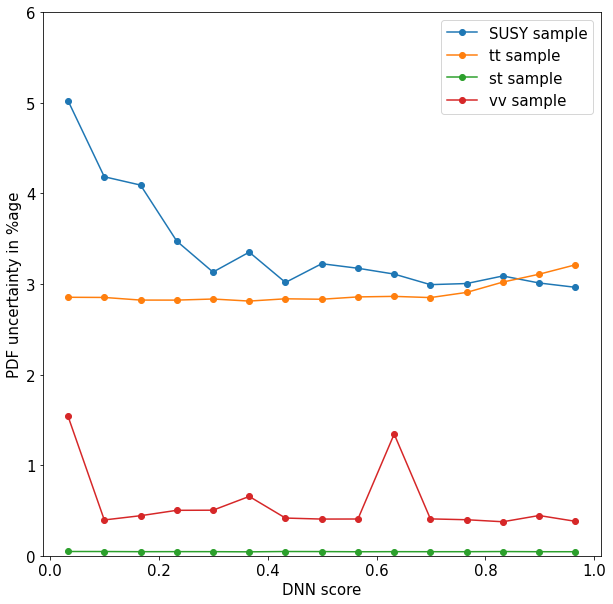

In [72]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, np.array(SUSY_pdf_unc).reshape(-1), '-o', label='SUSY sample')
ax.plot(bin_centers, np.array(tt_pdf_unc).reshape(-1) , '-o', label='tt sample')
ax.plot(bin_centers, np.array(st_pdf_unc).reshape(-1) , '-o', label='st sample')
ax.plot(bin_centers, np.array(vv_pdf_unc).reshape(-1) , '-o', label='vv sample')
ax.set_ylabel('PDF uncertainty in %age', fontsize=15)
ax.set_xlabel('DNN score', fontsize=15)
ax.set_ylim(0,6)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 15}, loc='upper right')

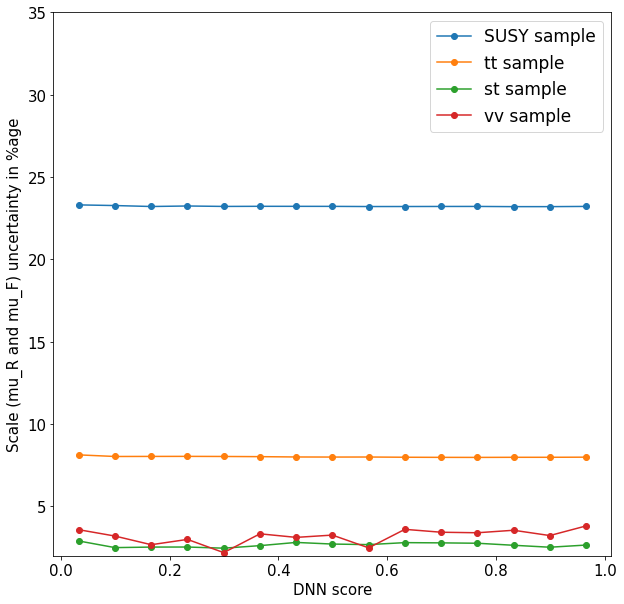

In [73]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, np.array(SUSY_ren_unc).reshape(-1), '-o', label='SUSY sample')
ax.plot(bin_centers, np.array(tt_ren_unc).reshape(-1) , '-o', label='tt sample')
ax.plot(bin_centers, np.array(st_ren_unc).reshape(-1) , '-o', label='st sample')
ax.plot(bin_centers, np.array(vv_ren_unc).reshape(-1) , '-o', label='vv sample')
ax.set_ylabel('Scale (mu_R and mu_F) uncertainty in %age', fontsize=15)
ax.set_xlabel('DNN score', fontsize=15)
ax.set_ylim(2,35)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

In [59]:
SUSY_pdf_mat.std(0)/ SUSY_pdf_mat.mean(0)

matrix([[0.12249209, 0.10204271, 0.0997996 , 0.08471947, 0.07637803,
         0.0817472 , 0.07358591, 0.07863082, 0.07740663, 0.07584017,
         0.07299751, 0.07329548, 0.07533363, 0.07344422, 0.0722829 ]])

In [159]:
jet1_up = np.loadtxt('Weights/ttbar/JES/JES_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/ttbar/JES/JES_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/ttbar/JES/JES_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/ttbar/JES/JES_sljet_weight_down.txt')

In [160]:
jet_fin_up   = np.multiply(jet1_up, jet2_up)
jet_fin_down = np.multiply(jet1_dn, jet2_dn)

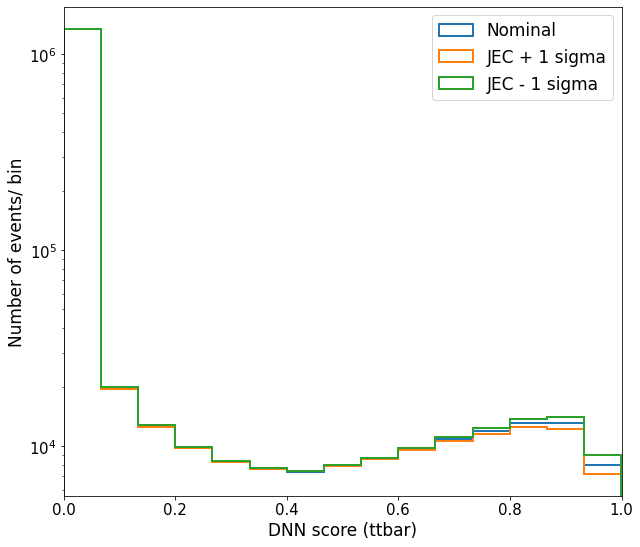

In [161]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'JEC + 1 sigma', linewidth=2 , weights=jet_fin_up[20000:])
ns3,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'JEC - 1 sigma', linewidth=2 , weights=jet_fin_down[20000:])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score (ttbar)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

In [162]:
tt_JES_unc  = abs((ns3 - ns2) / ns1) * 50

In [163]:
jet1_up = np.loadtxt('Weights/ttbar/JER/JER_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/ttbar/JER/JER_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/ttbar/JER/JER_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/ttbar/JER/JER_sljet_weight_down.txt')

In [164]:
jet_fin_up   = np.multiply(jet1_up, jet2_up)
jet_fin_down = np.multiply(jet1_dn, jet2_dn)

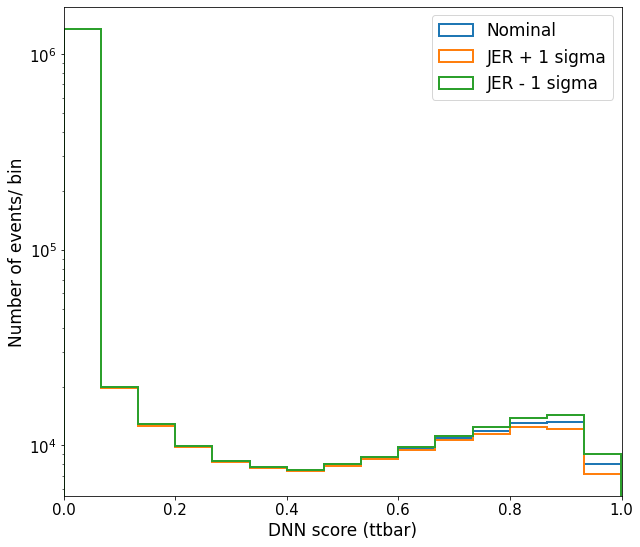

In [165]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'JER + 1 sigma', linewidth=2 , weights=jet_fin_up[20000:])
ns3,bins1,patches = ax.hist(tt_pred, histtype='step', bins=15, label = 'JER - 1 sigma', linewidth=2 , weights=jet_fin_down[20000:])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score (ttbar)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper right')

In [166]:
tt_JER_unc  = abs((ns3 - ns2) / ns1) * 50

In [125]:
jet1_up = np.loadtxt('Weights/SUSY/Mstop_175/JES/JES_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/SUSY/Mstop_175/JES/JES_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/SUSY/Mstop_175/JES/JES_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/SUSY/Mstop_175/JES/JES_sljet_weight_down.txt')

In [126]:
jet_fin_up   = np.multiply(jet1_up, jet2_up)
jet_fin_down = np.multiply(jet1_dn, jet2_dn)

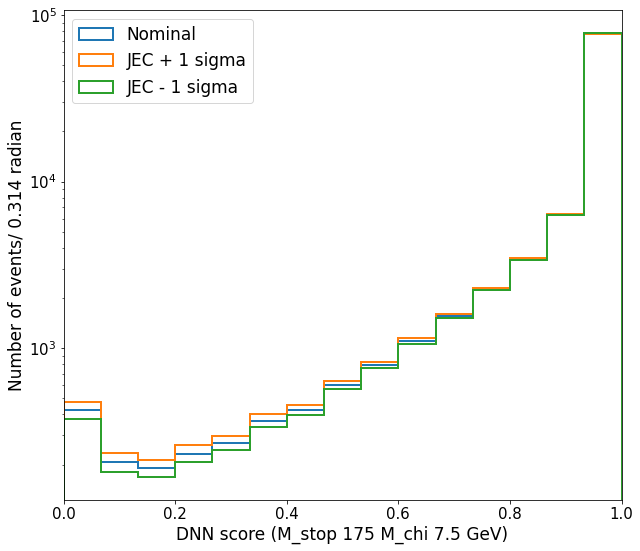

In [127]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'JEC + 1 sigma', linewidth=2 , weights=jet_fin_up[30000:])
ns3,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'JEC - 1 sigma', linewidth=2 , weights=jet_fin_down[30000:])
ax.set_ylabel('Number of events/ 0.314 radian', fontsize=17)
ax.set_xlabel('DNN score (M_stop 175 M_chi 7.5 GeV)', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper left')

In [128]:
SUSY_JES_unc  = abs((ns3 - ns2) / ns1) * 50

In [129]:
jet1_up = np.loadtxt('Weights/SUSY/Mstop_175/JER/JER_ljet_weight_up.txt')
jet1_dn = np.loadtxt('Weights/SUSY/Mstop_175/JER/JER_ljet_weight_down.txt')
jet2_up = np.loadtxt('Weights/SUSY/Mstop_175/JER/JER_sljet_weight_up.txt'  )
jet2_dn = np.loadtxt('Weights/SUSY/Mstop_175/JER/JER_sljet_weight_down.txt')

In [130]:
jet_fin_up   = np.multiply(jet1_up, jet2_up)
jet_fin_down = np.multiply(jet1_dn, jet2_dn)

ValueError: weights should have the same shape as x

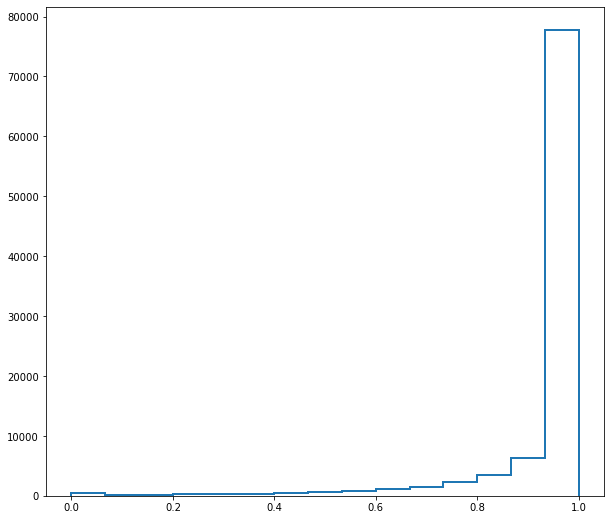

In [173]:
fig,ax  = plt.subplots(figsize=(10,9))

ns1,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'Nominal'      , linewidth=2)
ns2,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'JER + 1 sigma', linewidth=2 , weights=jet_fin_up[30000:])
ns3,bins1,patches = ax.hist(SUSY_pred, histtype='step', bins=15, label = 'JER - 1 sigma', linewidth=2 , weights=jet_fin_down[30000:])
ax.set_ylabel('Number of events/ bin', fontsize=17)
ax.set_xlabel('DNN score', fontsize=17)
ax.set_xlim(0,1)
ax.set_yscale('log')
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 17}, loc='upper left')

In [132]:
SUSY_JER_unc  = abs((ns3 - ns2) / ns1) * 50

In [133]:
SUSY_scale_unc= np.array(SUSY_ren_unc).reshape(-1)

In [134]:
SUSY_PDF_unc= np.array(SUSY_pdf_unc).reshape(-1)

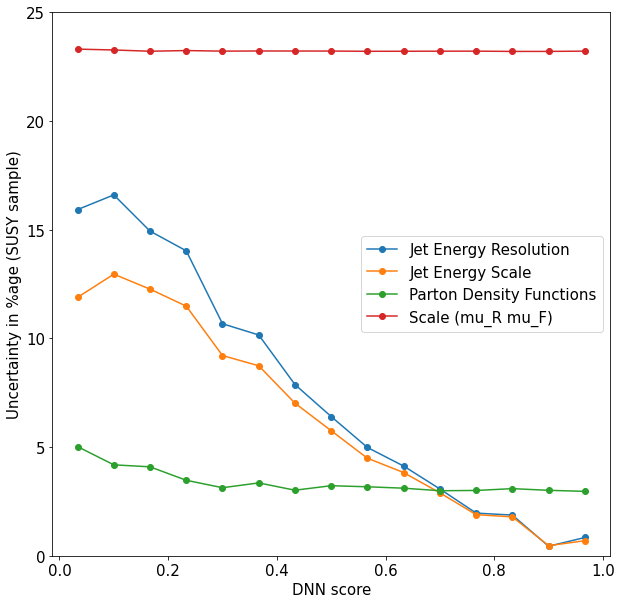

In [144]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, SUSY_JER_unc   , '-o', label='Jet Energy Resolution')
ax.plot(bin_centers, SUSY_JES_unc   , '-o', label='Jet Energy Scale')
ax.plot(bin_centers, SUSY_PDF_unc   , '-o', label='Parton Density Functions')
ax.plot(bin_centers, SUSY_scale_unc , '-o', label='Scale (mu_R mu_F)')
ax.set_ylabel('Uncertainty in %age (SUSY sample)', fontsize=15)
ax.set_xlabel('DNN score', fontsize=15)
ax.set_ylim(0,25)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 15}, loc='center right')

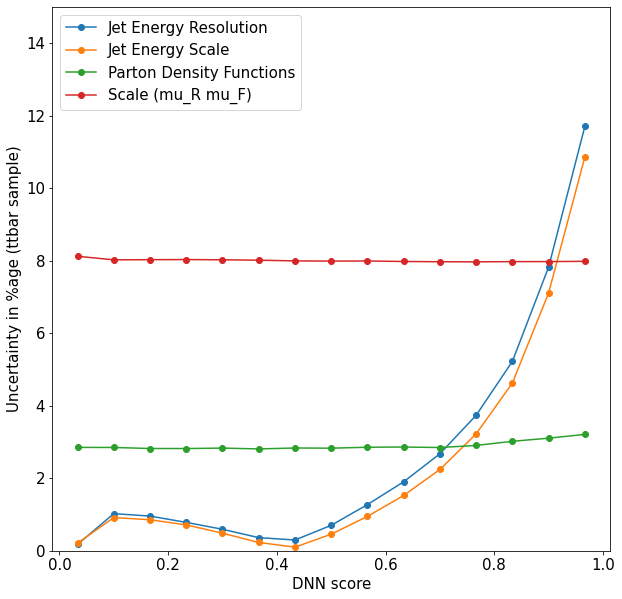

In [172]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(bin_centers, tt_JER_unc   , '-o', label='Jet Energy Resolution')
ax.plot(bin_centers, tt_JES_unc   , '-o', label='Jet Energy Scale')
ax.plot(bin_centers, np.array(tt_pdf_unc).reshape(-1) , '-o', label='Parton Density Functions')
ax.plot(bin_centers, np.array(tt_ren_unc).reshape(-1) , '-o', label='Scale (mu_R mu_F)')
ax.set_ylabel('Uncertainty in %age (ttbar sample)', fontsize=15)
ax.set_xlabel('DNN score', fontsize=15)
ax.set_ylim(0,15)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.legend(prop={'size': 15}, loc='upper left')

###### 